In [1]:
from dasly.das_master import Dasly
import numpy as np
import pandas as pd
import yaml

In [2]:
# Define the path to the YAML file
yaml_path = '../config.yml'

# Open and read the YAML file
with open(yaml_path, 'r') as file:
    params = yaml.safe_load(file)


# Access parameters from the YAML file
input_dir = params['input_dir']
start_exact_second = params['start_exact_second']
integrate = params['integrate']

database_type = params['database']['database_type']
dbapi = params['database']['dbapi']
endpoint = params['database']['endpoint']
port = params['database']['port']
database = params['database']['database']
database_table = params['database']['database_table']

hdf5_file_length = params['hdf5_file_length']
batch = params['dasly']['batch']
batch_gap = params['dasly']['batch_gap']

lowpass_filter_freq = params['lowpass_filter_freq']
decimate_t_rate = params['decimate_t_rate']

gaussian_smooth_s1 = params['gaussian_smooth']['s1']
gaussian_smooth_s2 = params['gaussian_smooth']['s2']
gaussian_smooth_std_s = params['gaussian_smooth']['std_s']

binary_threshold = params['binary_threshold']

hough_speed_res = params['hough_transform']['speed_res']
hough_length_meters = params['hough_transform']['length_meters']

dbscan_eps_seconds = params['dbscan_eps_seconds']

In [3]:
chIndex_all = np.arange(0, 800)
chIndex_remove1 = np.arange(0, 36)
chIndex_remove2 = np.arange(365, 387)
chIndex_remove3 = np.arange(751, 800)
chIndex_remove = np.concatenate((
    chIndex_remove1, chIndex_remove2, chIndex_remove3))
chIndex = np.setdiff1d(chIndex_all, chIndex_remove)
das = Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/Aastfjordbrua/',
    start='20231005 082400',  # One car
    # start='20231005 085100',  # Noise
    duration=60,
    integrate=False,
    chIndex=chIndex,
)

7 files, from 20231005 082354 to 20231005 082454


Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
vmin: -7.37e-09, vmax: 7.37e-09


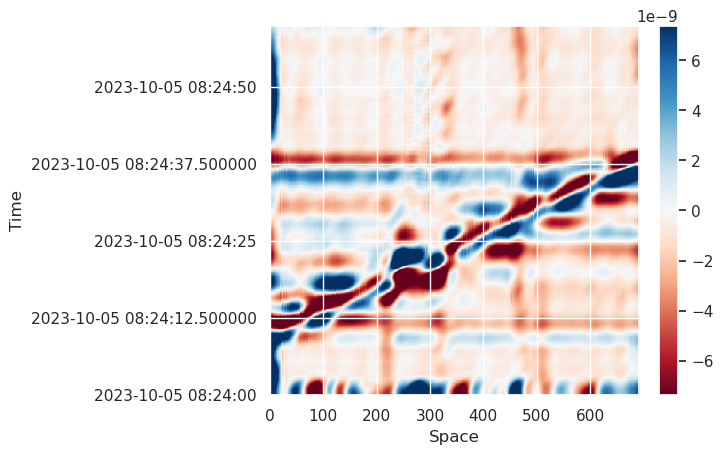

In [4]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=70,
    s2=100,
    std_s=10)

das.heatmap()

vmax: 0.0021


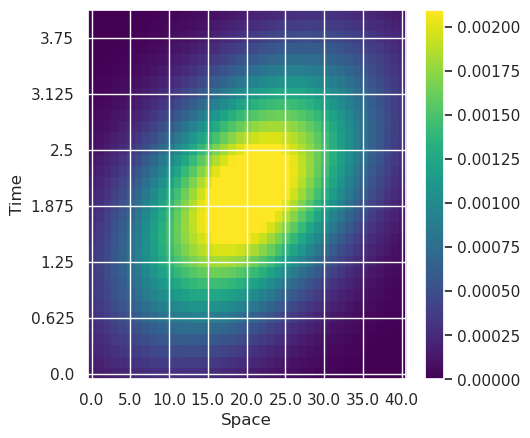

In [5]:
das.heatmap(
    das.gauss_kernel,
    aspect=das.signal.shape[1] / das.signal.shape[0]
)

Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
vmin: -9.71e-09, vmax: 9.71e-09


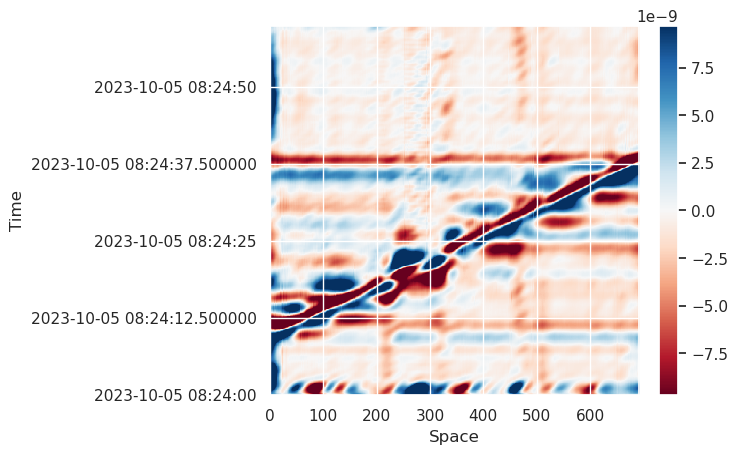

In [10]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=80,
    s2=90,
    std_s=10)

das.heatmap()

vmax: 0.00353


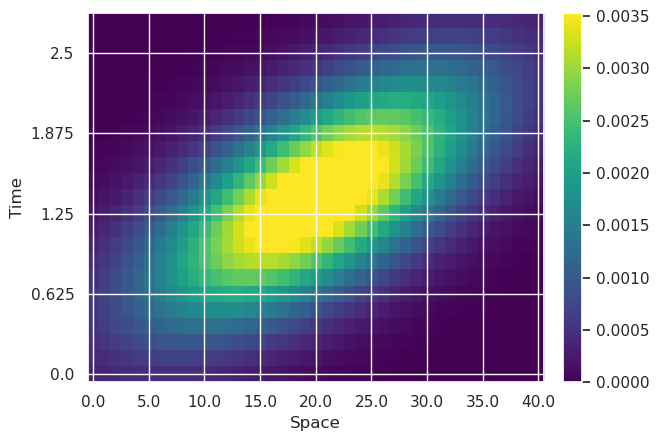

In [11]:
das.heatmap(
    das.gauss_kernel,
    aspect=das.signal.shape[1] / das.signal.shape[0]
)

Signal updated with low-pass filter.
Signal updated with new temporal sampling rate 8.
Signal updated with Gaussian smoothing.
vmin: -1.16e-08, vmax: 1.16e-08


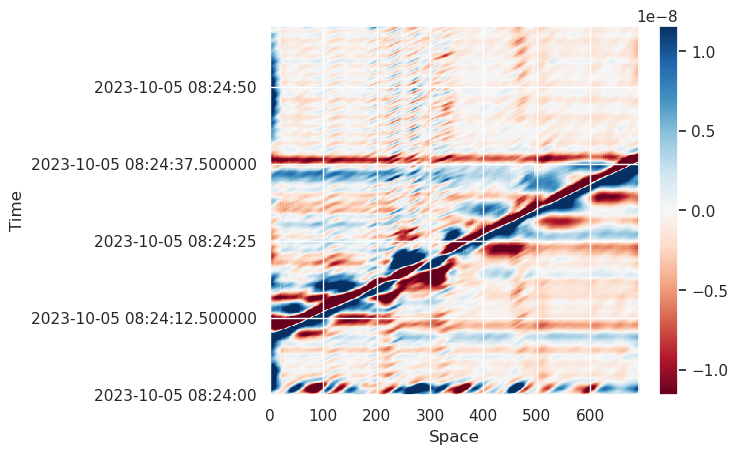

In [8]:
das.reset()
# forward Gaussian smoothing
###########################################################################
das.lowpass_filter(cutoff=lowpass_filter_freq)
das.decimate(t_rate=decimate_t_rate)
das.gaussian_smooth(
    s1=85,
    s2=86,
    std_s=10)

das.heatmap()

vmax: 0.00836


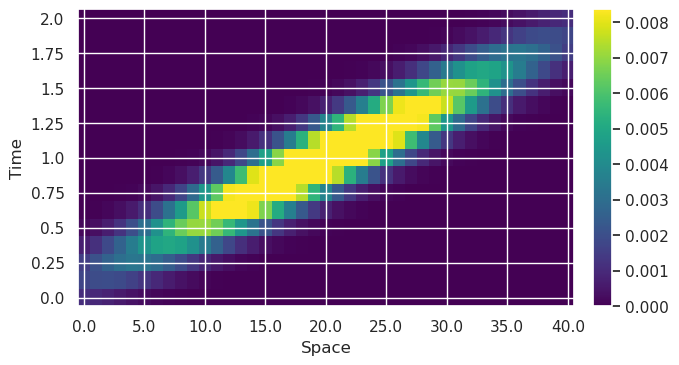

In [9]:
das.heatmap(
    das.gauss_kernel,
    aspect=das.signal.shape[1] / das.signal.shape[0]
)